In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [2]:
 hear= pd.read_csv('heart_cleveland_upload.csv')

In [3]:
# En esta linea mostramos los 50 primeros registros para realizar nuestro analisis exploratorio
hear.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
print(hear.shape)

(297, 14)


In [5]:
hear.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [6]:
# la siguiente linea lo que hace es obtener un resumen estadístico de nuestro Dataset.
hear.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
# Identificar valores faltantes en nuestro dataset
print(hear.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [8]:
# Convertir tipos de datos a int
hear['oldpeak'] = hear['oldpeak'].astype('int')

In [9]:
#Revisamos si los datos corresponden todos al tipo int.
hear.dtypes

age          int64
sex          int64
cp           int64
trestbps     int64
chol         int64
fbs          int64
restecg      int64
thalach      int64
exang        int64
oldpeak      int32
slope        int64
ca           int64
thal         int64
condition    int64
dtype: object

In [10]:
# Renombrar columnas
hear = hear.rename(columns={'age': 'edad','sex':'sexo','cp':'dolor_de_pecho','trestbps':'presion_arterial','chol':'colesterol','fbs':'Glucema_en_ayunas',
                          'restecg':'R_electrocardiograma','thalach':'Ritmo_cardiaco','exang':'Angina_inducida','oldpeak':'ST_depresion_inducido',
                           'slope':'pendiente_segmento_ST','ca':'N_venas','thal':'Anemia','condition':'condicion'})

In [11]:
#Revisamos si los datos corresponden todos al tipo int.
hear.dtypes

edad                     int64
sexo                     int64
dolor_de_pecho           int64
presion_arterial         int64
colesterol               int64
Glucema_en_ayunas        int64
R_electrocardiograma     int64
Ritmo_cardiaco           int64
Angina_inducida          int64
ST_depresion_inducido    int32
pendiente_segmento_ST    int64
N_venas                  int64
Anemia                   int64
condicion                int64
dtype: object

In [12]:
nivel_minimo = 1
nivel_maximo = 90
Total_Atipicos =((hear['edad']<nivel_minimo) | (hear['edad']>nivel_maximo)).sum()
print("El total de los datos atipicos para edad es: {}".format(Total_Atipicos))

El total de los datos atipicos para edad es: 0


Text(0.5, 1.0, 'identificación de datos atipicos')

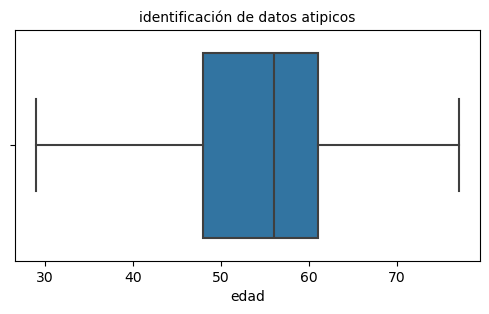

In [13]:
#la edad promedio puede estar entre 1 y 90 años
plt.figure(figsize=(6,3))
sns.boxplot(x=hear['edad'])
plt.title('identificación de datos atipicos',fontsize=10)

In [14]:
nivel_minimo = 80
nivel_maximo = 120
Total_Atipicos =((hear['presion_arterial']<nivel_minimo) | (hear['presion_arterial']>nivel_maximo)).sum()
print("El total de los datos atipicos para presion_arterial es: {}".format(Total_Atipicos))

El total de los datos atipicos para presion_arterial es: 200


Text(0.5, 1.0, 'identificación de datos atipicos')

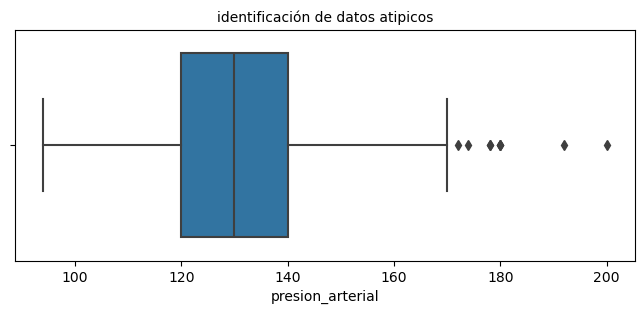

In [15]:
# la presión arterial normal debe estar entre 120 sistolica y 80 diastolica
plt.figure(figsize=(8,3))
sns.boxplot(x=hear['presion_arterial'])
plt.title('identificación de datos atipicos',fontsize=10)

In [16]:
nivel_minimo = 100
nivel_maximo = 200
Total_Atipicos =((hear['colesterol']<nivel_minimo) | (hear['colesterol']>nivel_maximo)).sum()
print("El total de los datos atipicos para colesterol es: {}".format(Total_Atipicos))

El total de los datos atipicos para colesterol es: 248


Text(0.5, 1.0, 'identificación de datos atipicos')

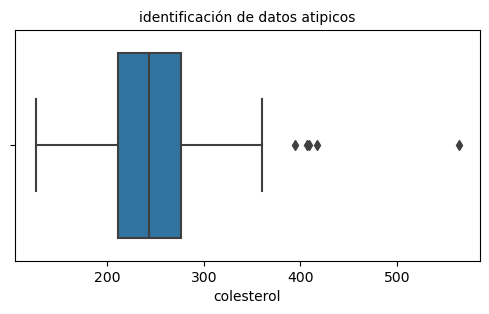

In [17]:
# el colesterol nomral debe estar en menos de 200 mg/dl
plt.figure(figsize=(6,3))
sns.boxplot(x=hear['colesterol'])
plt.title('identificación de datos atipicos',fontsize=10)

In [18]:
nivel_minimo = 50
nivel_maximo = 100
Total_Atipicos =((hear['Glucema_en_ayunas']<nivel_minimo) | (hear['Glucema_en_ayunas']>nivel_maximo)).sum()
print("El total de los datos atipicos para Glucema_en_ayunas es: {}".format(Total_Atipicos))

El total de los datos atipicos para Glucema_en_ayunas es: 297


Text(0.5, 1.0, 'identificación de datos atipicos')

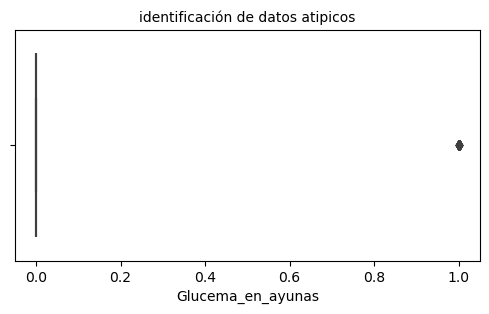

In [19]:
# la glucea normal debe estar en menos de 100 mg/dl
plt.figure(figsize=(6,3))
sns.boxplot(x=hear['Glucema_en_ayunas'])
plt.title('identificación de datos atipicos',fontsize=10)

Text(0.5, 1.0, 'identificación de datos atipicos')

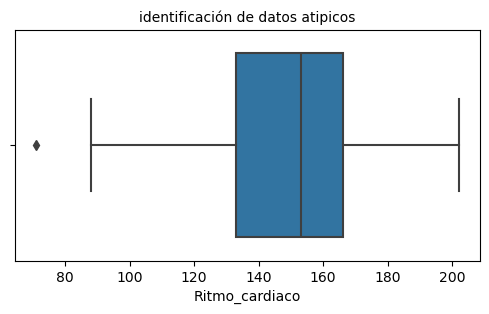

In [20]:
# para este caso se debe restar de 220 la edad de la persona y ese serial el valor maximo para cada paciente.
plt.figure(figsize=(6,3))
sns.boxplot(x=hear['Ritmo_cardiaco'])
plt.title('identificación de datos atipicos',fontsize=10)

In [21]:
nivel_minimo = 0
nivel_maximo = 1
Total_Atipicos =((hear['ST_depresion_inducido']<nivel_minimo) | (hear['ST_depresion_inducido']>nivel_maximo)).sum()
print("El total de los datos atipicos para ST_depresion_inducido es: {}".format(Total_Atipicos))

El total de los datos atipicos para ST_depresion_inducido es: 59


Text(0.5, 1.0, 'identificación de datos atipicos')

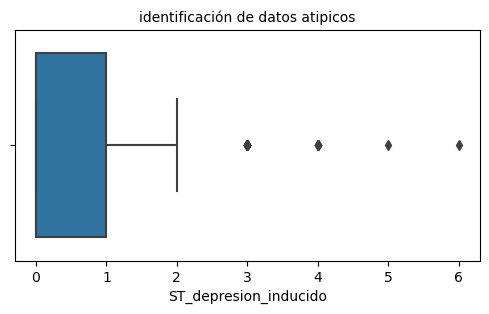

In [22]:
#Leve menos de 1mm
plt.figure(figsize=(6,3))
sns.boxplot(x=hear['ST_depresion_inducido'])
plt.title('identificación de datos atipicos',fontsize=10)

In [23]:
#Paso 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
hear['condicion'].value_counts()

condicion
0    160
1    137
Name: count, dtype: int64

In [45]:
# Dividimos los datos en conjuntos de entrenamiento y prueba 
x=hear.drop('condicion',axis=1)
y=hear['condicion']
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [46]:
modelo_regression=LogisticRegression(solver="liblinear")
modelo_regression.fit(X_train,Y_train)
prediccion=modelo_regression.predict(X_test)

In [47]:
print(y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condicion, Length: 75, dtype: int64


In [48]:
print(prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [52]:
#paso 6  Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



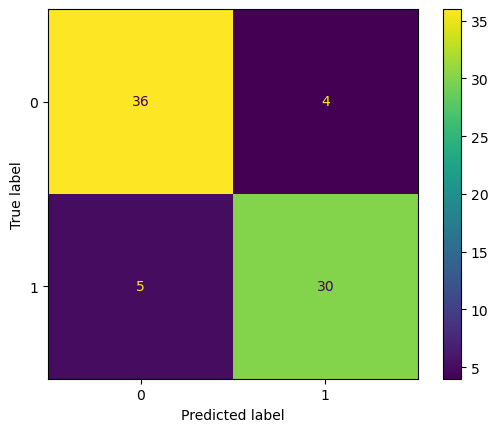

In [58]:
# paso 7 . Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#Matrix de confuusión del modelo
cm=confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

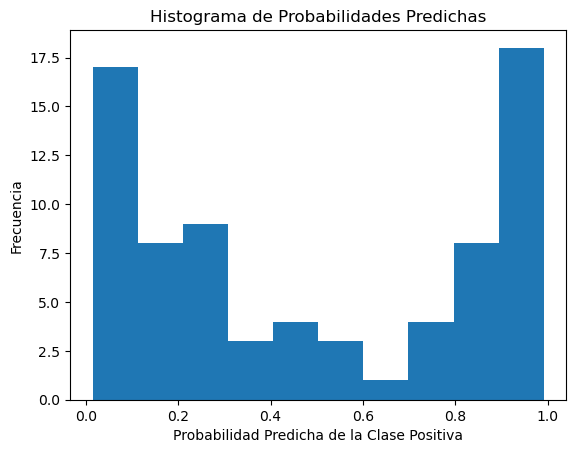

In [60]:
# Histograma de Probabilidades Predichas
probabilidades = modelo_regression.predict_proba(X_test)[:,1]
plt.hist(probabilidades, bins=10)
plt.title('Histograma de Probabilidades Predichas')
plt.xlabel('Probabilidad Predicha de la Clase Positiva')
plt.ylabel('Frecuencia')
plt.show()

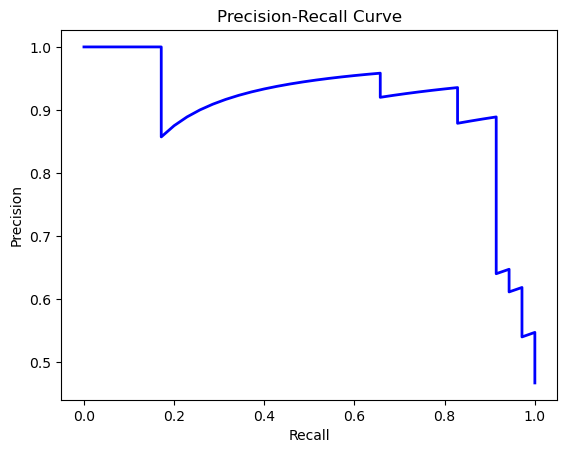

In [63]:
#  Curva de Precisión-Recall:
precision, recall, thresholds = precision_recall_curve(y_test, modelo_regression.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

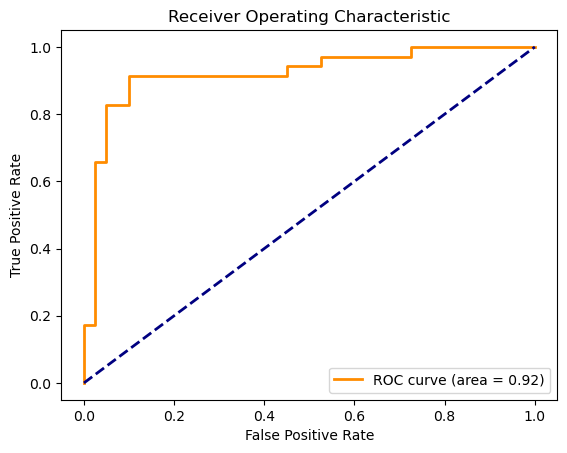

In [65]:
#  Curva ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(y_test, modelo_regression.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

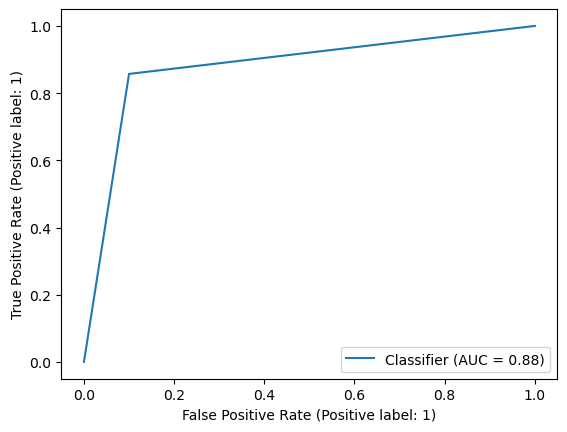

In [66]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,prediccion)
plt.show()

In [67]:
# Guardar el DataFrame limpio
hear.to_csv('archivo_limpio.csv', index=False)